In [1]:
!pip install pandas
import numpy as np
import pandas as pd
import t3_utils as t3
import time 
from ast import literal_eval
import matplotlib.pyplot as plt

Defaulting to user installation because normal site-packages is not writeable


In [2]:
# change the file path here
file_path_base = r"/home/dani/Dropbox/JKU/Semester-7/Multimedia_Search_and_Retrieval/Excercises/MMSR-Group-C/3/datasets/"
file_path_info = file_path_base + "id_information_mmsr.tsv" 
file_path_word2vec = file_path_base + "id_lyrics_word2vec_mmsr.tsv"
file_path_tfidf = file_path_base + "id_lyrics_tf-idf_mmsr.tsv"
file_path_bert = file_path_base + "id_lyrics_bert_mmsr.tsv"

file_path_genre = file_path_base + "id_genres_mmsr.tsv"
file_path_musicnn = file_path_base + "id_musicnn_mmsr.tsv"
file_path_mfcc_bow = file_path_base + "id_mfcc_bow_mmsr.tsv"
file_path_ivec_256 = file_path_base + "id_ivec256_mmsr.tsv"
file_path_logfluc = file_path_base + "id_blf_logfluc_mmsr.tsv"

file_path_incp = file_path_base  + "id_incp_mmsr.tsv"
file_path_vgg19 = file_path_base + "id_vgg19_mmsr.tsv"
file_path_resnet = file_path_base + "id_resnet_mmsr.tsv"
file_path_url = file_path_base + "id_url_mmsr.tsv"

df_info = pd.read_table(file_path_info)

# text
df_word2vec = pd.read_table(file_path_word2vec)
df_tfidf = pd.read_table(file_path_tfidf)
df_bert = pd.read_table(file_path_bert)

# audio
df_genre = pd.read_table(file_path_genre)
df_musicnn = pd.read_table(file_path_musicnn)
df_mfcc_bow = pd.read_table(file_path_mfcc_bow)
df_ivec_256 = pd.read_table(file_path_ivec_256)
df_logfluc = pd.read_table(file_path_logfluc)

# video
df_incp = pd.read_table(file_path_incp)
df_vgg19 = pd.read_table(file_path_vgg19)
df_resnet = pd.read_table(file_path_resnet)
df_url = pd.read_table(file_path_url)

df_genre["genre"] = df_genre["genre"].apply(literal_eval) # convert string into array

In [4]:
# getting the unique genres
genres = df_genre.explode("genre")["genre"].values
unique_genres = np.unique(genres)
len(unique_genres)

1112

In [5]:
# Video-based(cos-sim, Resnet)
t3.song_retrieval(df_info, df_resnet, "As Long as You Love Me","Justin Bieber", 10, t3.cos_sim, filter = ["id", "artist", "song", "sim"])

NameError: name 'df_resnet' is not defined

In [13]:
# prepare early fusion feature
# normalizes and joins both features
df_normalized_bert = t3.normalize_frame(df_bert)
df_normalized_mfcc_bow = t3.normalize_frame(df_mfcc_bow)
df_early_fusion = pd.merge(df_normalized_bert, df_normalized_mfcc_bow, on="id", how="outer")

In [12]:
# Early Fusion(cos-sim, bert, mfcc bow)
t3.song_retrieval(df_info, df_early_fusion, "As Long as You Love Me","Justin Bieber", 10, t3.cos_sim, filter = ["id", "artist", "song", "sim"])

,id,artist,song,sim
4238,Q55tUGZvegLapLPP,Britney Spears,What It's Like to Be Me,0.965792
9374,vQdf4tuaxtF73hKF,Kane Brown,Good as You,0.964645
6638,f0IDbcNWwCklUrwS,Lafee,Heul doch,0.964315
10003,zLIZEr0zFataPTEI,Stacie Orrico,Hesitation,0.962741
9676,xHSvLWaBLBPPjTC3,Afro-Dite,Never Let It Go,0.962694
8145,o3oViO0Txpr4xCtt,why mona,Wannabe,0.962219
426,2QjBaiCeX5bxuQm3,Florrie,Begging Me,0.961968
8464,pxzFlX2EtjGHbOZB,Jennifer Lopez,Do It Well,0.961723
2196,DCuWGUQBdWiIXEkR,Belinda,Good... Good,0.961463
2209,DI7aC6Bvhf9z8LmV,Appleton,Fantasy,0.961455


In [6]:
# here we prepare our dataset before putting it in the pipeline
# computes the idcg value for each song beforehand
df_genre["idcg_value"] = df_genre.apply(lambda x: t3.idcg(x, df_genre), axis=1)
df_genre

,id,genre,idcg_value
0,01Yfj2T3YTwJ1Yfy,"[rock, christian rock]",4.031238
1,01gyRHLquwXDlhkO,"[hip hop, rap, grindcore, death metal]",3.029040
2,01rMxQv6vhyE1oQX,"[rock, pop punk]",3.692660
3,02RGE9FNH65RtMS7,"[trance, techno, progressive trance]",1.941748
4,02ZnlCGZEbkfCDxo,"[pop, italian pop, latin, europop, ambient, po...",2.335130
...,...,...,...
10089,zyzILCQvVeUFIINi,"[rock, pop, indie rock, folk rock, new wave, m...",3.076931
10090,zzgS4ZqyswamEWNj,"[pop, rock, teen pop, soundtrack, singer songw...",3.064803
10091,zzoFYDMlqU1X2zz1,"[jazz, jazz fusion]",3.330893
10092,zzpkRCGA5ud8q4mv,"[soul, blues, r b, blues rock, southern soul, ...",2.559602


In [7]:
# computes the number of relevant songs in the dataset for each song (needed to compute recall)
df_genre["rel_count"] = df_genre["genre"].apply(lambda genre: t3.get_rel_song_count(genre, df_genre["genre"]))
df_genre

,id,genre,idcg_value,rel_count
0,01Yfj2T3YTwJ1Yfy,"[rock, christian rock]",4.031238,4988
1,01gyRHLquwXDlhkO,"[hip hop, rap, grindcore, death metal]",3.029040,1209
2,01rMxQv6vhyE1oQX,"[rock, pop punk]",3.692660,5073
3,02RGE9FNH65RtMS7,"[trance, techno, progressive trance]",1.941748,345
4,02ZnlCGZEbkfCDxo,"[pop, italian pop, latin, europop, ambient, po...",2.335130,4942
...,...,...,...,...
10089,zyzILCQvVeUFIINi,"[rock, pop, indie rock, folk rock, new wave, m...",3.076931,7080
10090,zzgS4ZqyswamEWNj,"[pop, rock, teen pop, soundtrack, singer songw...",3.064803,6968
10091,zzoFYDMlqU1X2zz1,"[jazz, jazz fusion]",3.330893,634
10092,zzpkRCGA5ud8q4mv,"[soul, blues, r b, blues rock, southern soul, ...",2.559602,6106


In [9]:
df_song_data = pd.merge(df_info, df_genre, on = "id")
df_song_data

,id,artist,song,album_name,genre,idcg_value,rel_count
0,01Yfj2T3YTwJ1Yfy,We As Human,Take The Bullets Away (feat. Lacey Sturm),We As Human,"[rock, christian rock]",4.031238,4988
1,01gyRHLquwXDlhkO,The Notorious B.I.G.,Somebody's Gotta Die,Life After Death (Remastered Edition),"[hip hop, rap, grindcore, death metal]",3.029040,1209
2,01rMxQv6vhyE1oQX,Against the Current,Chasing Ghosts,In Our Bones,"[rock, pop punk]",3.692660,5073
3,02RGE9FNH65RtMS7,Barthezz,Infected,Trance - The Early Years (1997-2002),"[trance, techno, progressive trance]",1.941748,345
4,02ZnlCGZEbkfCDxo,Laura Pausini,Tra Te E Il Mare,The Best of Laura Pausini - E Ritorno Da Te,"[pop, italian pop, latin, europop, ambient, po...",2.335130,4942
...,...,...,...,...,...,...,...
10089,zyzILCQvVeUFIINi,Crowded House,When You Come,Temple Of Low Men,"[rock, pop, indie rock, folk rock, new wave, m...",3.076931,7080
10090,zzgS4ZqyswamEWNj,Britney Spears,My Only Wish (This Year),Platinum Christmas,"[pop, rock, teen pop, soundtrack, singer songw...",3.064803,6968
10091,zzoFYDMlqU1X2zz1,Thundercat,DUI,Drunk,"[jazz, jazz fusion]",3.330893,634
10092,zzpkRCGA5ud8q4mv,Otis Redding,Rock Me Baby,Otis Blue,"[soul, blues, r b, blues rock, southern soul, ...",2.559602,6106


nearly half
random baseline
Avg precision: 0.44622548048345206
Avg recall: 0.0010446130424947673
Avg ndcg: 0.13791182015109196
Avg genre diversity: 5.063824080276245
genre coverage: 1.0


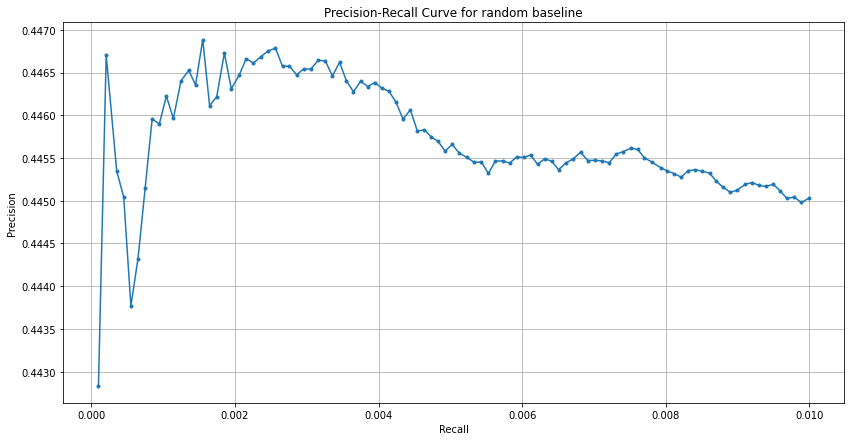

nearly half
word2vec euc-sim
Avg precision: 0.5023182088369331
Avg recall: 0.0015922490167691076
Avg ndcg: 0.17779734634943692
Avg genre diversity: 4.83642443253612
genre coverage: 0.9334532374100719


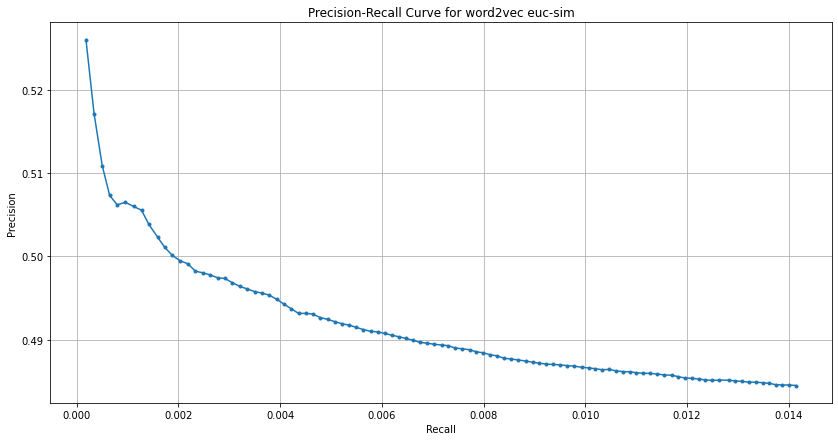

nearly half
tfidf cos-sim
Avg precision: 0.5109867247870016
Avg recall: 0.001343292094559057
Avg ndcg: 0.17149983044698994
Avg genre diversity: 4.972622666204345
genre coverage: 0.9811151079136691


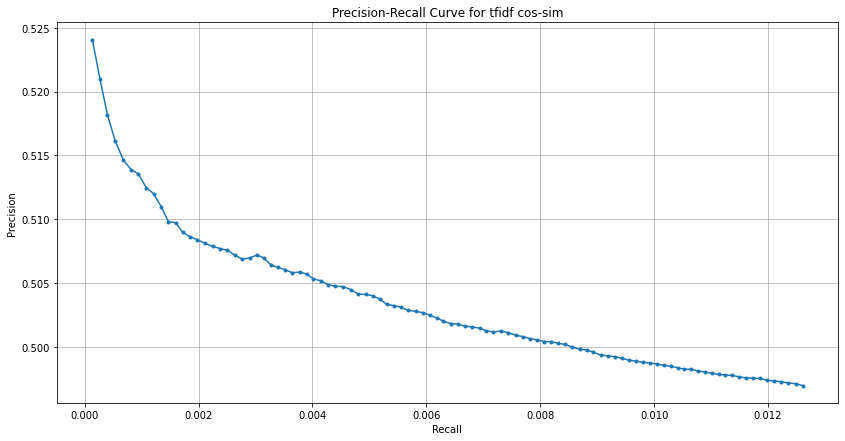

nearly half
bert cos-sim
Avg precision: 0.5522785813354479
Avg recall: 0.0018547120289303374
Avg ndcg: 0.20183773246548498
Avg genre diversity: 4.8868134942149375
genre coverage: 0.9127697841726619


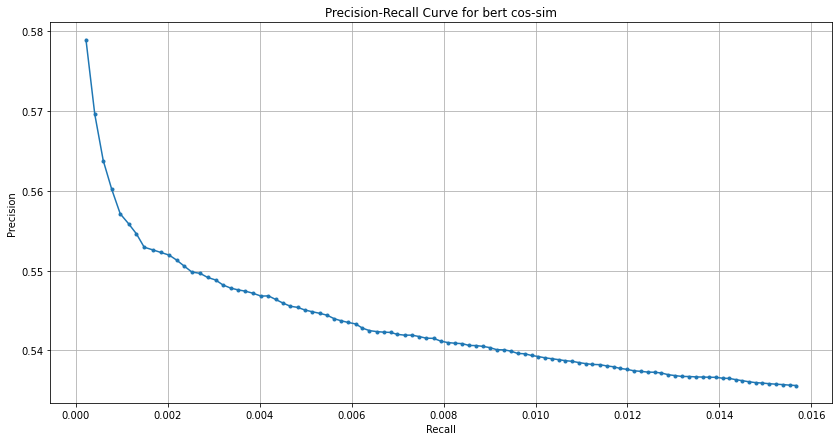

nearly half
mfcc_bow cos-sim
Avg precision: 0.5885476520705374
Avg recall: 0.0017947373024133132
Avg ndcg: 0.22569410026163622
Avg genre diversity: 4.7436668295826
genre coverage: 0.9811151079136691


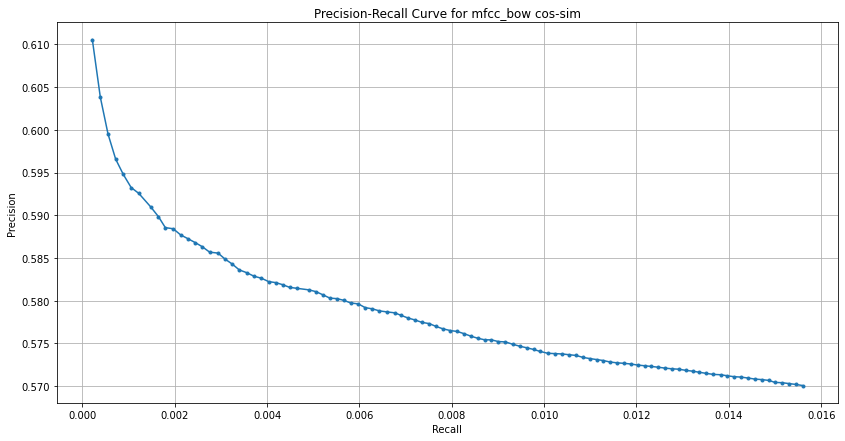

nearly half
musicnn cos-sim
Avg precision: 0.6240043590251597
Avg recall: 0.0019679607283780453
Avg ndcg: 0.24283269583851352
Avg genre diversity: 4.713777377273991
genre coverage: 0.9973021582733813


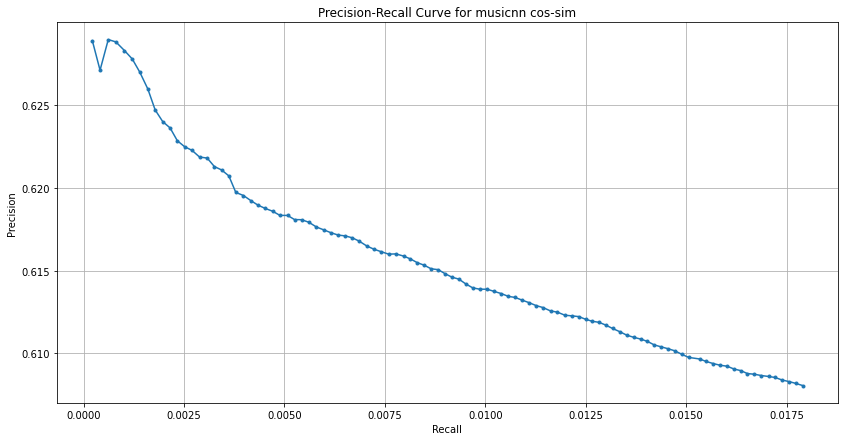

nearly half
ivec_256 cos-sim
Avg precision: 0.5656231424608696
Avg recall: 0.0017221895977655155
Avg ndcg: 0.2183574640258898
Avg genre diversity: 4.90501948427141
genre coverage: 0.9991007194244604


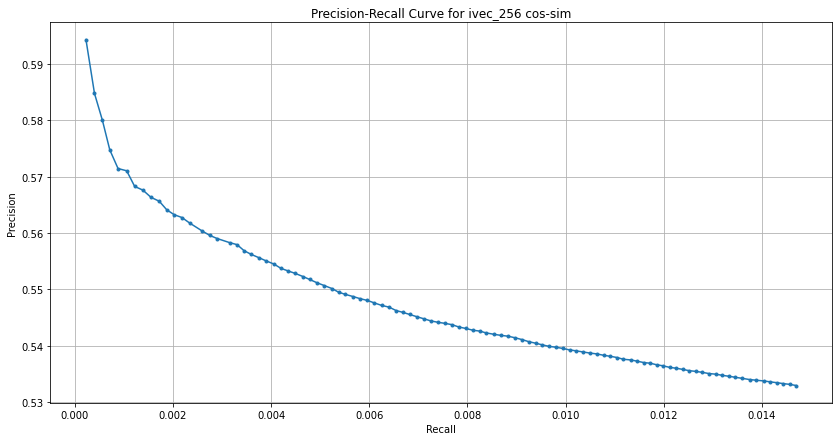

C:\Users\Richard\Desktop\JKU\1.Semester-WS2023\MultimediaSearchAndRetrieval\MMSR-Group-C\2\t2_utils.py:9: RuntimeWarning: invalid value encountered in double_scalars
  return np.dot(query,target)/(norm(query)*norm(target))


nearly half
logfluc cos-sim
Avg precision: 0.508351495938188
Avg recall: 0.0014227315651069927
Avg ndcg: 0.1817986581942194
Avg genre diversity: 4.920141801555555
genre coverage: 0.9487410071942446


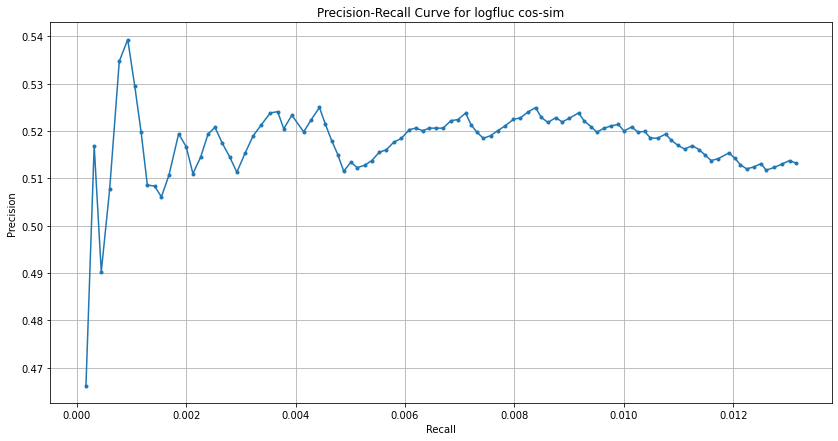

Execution time(min): 232.19102525313696


,Avg precision,Avg recall,Avg ndcg,Avg genre diversity,Genre coverage
random baseline,0.446225,0.001045,0.137912,5.063824,1.0
word2vec euc-sim,0.502318,0.001592,0.177797,4.836424,0.933453
tfidf cos-sim,0.510987,0.001343,0.1715,4.972623,0.981115
bert cos-sim,0.552279,0.001855,0.201838,4.886813,0.91277
mfcc_bow cos-sim,0.588548,0.001795,0.225694,4.743667,0.981115
musicnn cos-sim,0.624004,0.001968,0.242833,4.713777,0.997302
ivec_256 cos-sim,0.565623,0.001722,0.218357,4.905019,0.999101
logfluc cos-sim,0.508351,0.001423,0.181799,4.920142,0.948741


In [8]:
# Warning: running this can take a long time
# Here we run the pipeline for every system and also print the respective precision recall curve
st = time.time()
k = 10
retr_systems = [("random baseline",df_song_data, t3.cos_sim), ("word2vec euc-sim", df_word2vec, t3.euc_sim), 
                ("tfidf cos-sim", df_tfidf, t3.cos_sim), ("bert cos-sim", df_bert, t3.cos_sim), 
                ("mfcc_bow cos-sim", df_mfcc_bow, t3.cos_sim), ("musicnn cos-sim", df_musicnn, t3.cos_sim), 
                ("ivec_256 cos-sim", df_ivec_256, t3.cos_sim), ("logfluc cos-sim", df_logfluc, t3.cos_sim),
               ("resnet cos-sim", df_resnet, t3.cos_sim), ("early fusion cos-sim", df_early_fusion, t3.cos_sim)]

retr_systems_columns = ["Avg precision", "Avg recall", "Avg ndcg", "Avg genre diversity", "Genre coverage"]
retr_systems_index = [tupl[0] for tupl in retr_systems]

df_metrics = pd.DataFrame(columns=retr_systems_columns, index = retr_systems_index)

for system in retr_systems:
    index, feature_set, sim_func = system
    metrics = t3.evaluation_pipeline(df_song_data, feature_set, sim_func, k, df_song_data.equals(feature_set))
    df_metrics.loc[index] = metrics[2:]
    print(index)
    print("Avg precision:", metrics[2])
    print("Avg recall:", metrics[3])
    print("Avg ndcg:", metrics[4])
    print("Avg genre diversity:", metrics[5])
    print("genre coverage:", metrics[6])
    plt.figure(figsize=(14, 7))
    plt.plot(metrics[1], metrics[0], marker='.')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall Curve for {index}')
    plt.grid(True)
    plt.show()
     
print("Execution time(min):", (time.time()-st)/60)
df_metrics

In [ ]:
# below this cell the evaluation pipeline for every retrieval system is run individually, so it can be ignored

In [ ]:
st = time.time()
metrics_random = t3.evaluation_pipeline(df_song_data, df_song_data, t3.cos_sim, 10, True)
print("random")
print("Avg precision:", metrics_random[2])
print("Avg recall:", metrics_random[3])
print("Avg ndcg:", metrics_random[4])
print("Avg genre diversity:", metrics_random[5])
print("genre coverage:", metrics_random[6])
print("Execution time(min):", (time.time()-st)/60)

In [ ]:
st = time.time()
metrics_word2vec = t3.evaluation_pipeline(df_song_data, df_word2vec, t3.euc_sim, 10)
print("word2vec")
print("Avg precision:", metrics_word2vec[2])
print("Avg recall:", metrics_word2vec[3])
print("Avg ndcg:", metrics_word2vec[4])
print("Avg genre diversity:", metrics_word2vec[5])
print("genre coverage:", metrics_word2vec[6])
print("Execution time(min):", (time.time()-st)/60)

In [ ]:
st = time.time()
metrics_tfidf = t3.evaluation_pipeline(df_song_data, df_tfidf, t3.cos_sim, 10)
print("tfidf")
print("Avg precision:", metrics_tfidf[2])
print("Avg recall:", metrics_tfidf[3])
print("Avg ndcg:", metrics_tfidf[4])
print("Avg genre diversity:", metrics_tfidf[5])
print("genre coverage:", metrics_tfidf[6])
print("Execution time(min):", (time.time()-st)/60)

In [ ]:
st = time.time()
metrics_bert = t3.evaluation_pipeline(df_song_data, df_bert, t3.cos_sim, 10)
print("bert")
print("Avg precision:", metrics_bert[2])
print("Avg recall:", metrics_bert[3])
print("Avg ndcg:", metrics_bert[4])
print("Avg genre diversity:", metrics_bert[5])
print("genre coverage:", metrics_bert[6])
print("Execution time(min):", (time.time()-st)/60)

In [ ]:
st = time.time()
metrics_mfcc_bow = t3.evaluation_pipeline(df_song_data,df_mfcc_bow, t3.cos_sim, 10)
print("mfcc_bow")
print("Avg precision:", metrics_mfcc_bow[2])
print("Avg recall:", metrics_mfcc_bow[3])
print("Avg ndcg:", metrics_mfcc_bow[4])
print("Avg genre diversity:", metrics_mfcc_bow[5])
print("genre coverage:", metrics_mfcc_bow[6])
print("Execution time(min):", (time.time()-st)/60)

In [ ]:
st = time.time()
metrics_musicnn = t3.evaluation_pipeline(df_song_data, df_musicnn, t3.cos_sim, 10)
print("musicnn")
print("Avg precision:", metrics_musicnn[2])
print("Avg recall:", metrics_musicnn[3])
print("Avg ndcg:", metrics_musicnn[4])
print("Avg genre diversity:", metrics_musicnn[5])
print("genre coverage:", metrics_musicnn[6])
print("Execution time(min):", (time.time()-st)/60)

In [ ]:
st = time.time()
metrics_ivec_256 = t3.evaluation_pipeline(df_song_data, df_ivec_256, t3.cos_sim, 10)
print("ivec_256")
print("Avg precision:", metrics_ivec_256[2])
print("Avg recall:", metrics_ivec_256[3])
print("Avg ndcg:", metrics_ivec_256[4])
print("Avg genre diversity:", metrics_ivec_256[5])
print("genre coverage:", metrics_ivec_256[6])
print("Execution time(min):", (time.time()-st)/60)

In [ ]:
st = time.time()
metrics_logfluc = t3.evaluation_pipeline(df_song_data, df_logfluc, t3.cos_sim, 10)
print("logfluc")
print("Avg precision:", metrics_logfluc[2])
print("Avg recall:", metrics_logfluc[3])
print("Avg ndcg:", metrics_logfluc[4])
print("Avg genre diversity:", metrics_logfluc[5])
print("genre coverage:", metrics_logfluc[6])
print("Execution time(min):", (time.time()-st)/60)

In [ ]:
st = time.time()
metrics_resnet = t3.evaluation_pipeline(df_song_data, df_resnet, t3.cos_sim, 10)
print("resnet")
print("Avg precision:", metrics_resnet[2])
print("Avg recall:", metrics_resnet[3])
print("Avg ndcg:", metrics_resnet[4])
print("Avg genre diversity:", metrics_resnet[5])
print("genre coverage:", metrics_resnet[6])
print("Execution time(min):", (time.time()-st)/60)

In [ ]:
st = time.time()
metrics_early_fusion = t3.evaluation_pipeline(df_song_data, df_early_fusion, t3.cos_sim, 10)
print("early fusion")
print("Avg precision:", metrics_early_fusion[2])
print("Avg recall:", metrics_early_fusion[3])
print("Avg ndcg:", metrics_early_fusion[4])
print("Avg genre diversity:", metrics_early_fusion[5])
print("genre coverage:", metrics_early_fusion[6])
print("Execution time(min):", (time.time()-st)/60)

In [11]:
def calc_songs(row, df_info: pd.DataFrame, df_feature: pd.DataFrame, sim_func, random = False):
    song_id = row["id"]
    song_artist = row["artist"]
    song_title = row["song"]

    df_retr_songs = t3.song_retrieval(df_info, df_feature, song_title, song_artist, 10, sim_func = sim_func, random = random)
    print(song_id, end=" ")
    return df_retr_songs["id"].to_numpy()

In [19]:
# Test zwecke ----------------------
st = time.time()

index, feature_set, sim_func = ("word2vec euc-sim", df_word2vec, t3.euc_sim)

new_df_info = df_info.head(10)
new_df_info['res_songs'] = df_info.head(10).apply(calc_songs, axis=1, args=(df_info, feature_set, sim_func, ))
new_df_info.to_json(orient='records', indent=2, path_or_buf=f'test-{index}.json')

print("Execution time(min):", (time.time()-st)/60)

In [ ]:
st = time.time()

index, feature_set, sim_func = ("word2vec euc-sim", df_word2vec, t3.euc_sim)
df_res_word2vec = df_info.apply(calc_songs, axis=1, args=(df_info, feature_set, sim_func, ))
df_res_word2vec.to_json(orient='records', indent=2, path_or_buf=f'{index}.json')

print("Execution time(min):", (time.time()-st)/60)

In [ ]:
st = time.time()

index, feature_set, sim_func = ("tfidf cos-sim", df_tfidf, t3.cos_sim)
df_res_tfid = df_info.apply(calc_songs, axis=1, args=(df_info, feature_set, sim_func, ))
df_res_tfid.to_json(orient='records', indent=2, path_or_buf=f'{index}.json')

print("Execution time(min):", (time.time()-st)/60)

In [ ]:
st = time.time()

index, feature_set, sim_func = ("bert cos-sim", df_bert, t3.cos_sim)
df_res_bert = df_info.apply(calc_songs, axis=1, args=(df_info, feature_set, sim_func, ))
df_res_bert.to_json(orient='records', indent=2, path_or_buf=f'{index}.json')

print("Execution time(min):", (time.time()-st)/60)

In [ ]:
st = time.time()

index, feature_set, sim_func = ("mfcc_bow cos-sim", df_mfcc_bow, t3.cos_sim)
df_res_mfcc_bow = df_info.apply(calc_songs, axis=1, args=(df_info, feature_set, sim_func, ))
df_res_mfcc_bow.to_json(orient='records', indent=2, path_or_buf=f'{index}.json')

print("Execution time(min):", (time.time()-st)/60)

In [ ]:
st = time.time()

index, feature_set, sim_func = ("musicnn cos-sim", df_musicnn, t3.cos_sim)
df_res_musicnn = df_info.apply(calc_songs, axis=1, args=(df_info, feature_set, sim_func, ))
df_res_musicnn.to_json(orient='records', indent=2, path_or_buf=f'{index}.json')

print("Execution time(min):", (time.time()-st)/60)

In [ ]:
st = time.time()

index, feature_set, sim_func = ("ivec_256 cos-sim", df_ivec_256, t3.cos_sim)
df_res_ivec_256 = df_info.apply(calc_songs, axis=1, args=(df_info, feature_set, sim_func, ))
df_res_ivec_256.to_json(orient='records', indent=2, path_or_buf=f'{index}.json')

print("Execution time(min):", (time.time()-st)/60)

In [ ]:
st = time.time()

index, feature_set, sim_func = ("logfluc cos-sim", df_logfluc, t3.cos_sim)
df_res_logfluc = df_info.apply(calc_songs, axis=1, args=(df_info, feature_set, sim_func, ))
df_res_logfluc.to_json(orient='records', indent=2, path_or_buf=f'{index}.json')

print("Execution time(min):", (time.time()-st)/60)

In [ ]:
st = time.time()

index, feature_set, sim_func = ("resnet cos-sim", df_resnet, t3.cos_sim)
df_res_resnet = df_info.apply(calc_songs, axis=1, args=(df_info, feature_set, sim_func, ))
df_res_resnet.to_json(orient='records', indent=2, path_or_buf=f'{index}.json')

print("Execution time(min):", (time.time()-st)/60)

In [ ]:
st = time.time()

index, feature_set, sim_func = ("early fusion cos-sim", df_early_fusion, t3.cos_sim)
df_res_early_fusion = df_info.apply(calc_songs, axis=1, args=(df_info, feature_set, sim_func, ))
df_res_early_fusion.to_json(orient='records', indent=2, path_or_buf=f'{index}.json')

print("Execution time(min):", (time.time()-st)/60)